In [19]:
# Load packages
import numpy as np
import scipy.stats as st
import scipy.signal as signal
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=14,weight='bold') #set default font size and weight for plots
import pandas as pd

In [2]:
import ec3

In [140]:
van1 = ec3.get_data(stations=889, type=2,years=range(1970, 2014), progress=False)

In [141]:
van2 = ec3.get_data(stations=51442, type=2,years=range(2013, 2020), progress=False)

In [132]:
van1.columns

Index(['Station', 'Longitude (x)', 'Latitude (y)', 'Station Name',
       'Climate ID', 'Date/Time', 'Year', 'Month', 'Day', 'Data Quality',
       'Max Temp (°C)', 'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag',
       'Mean Temp (°C)', 'Mean Temp Flag', 'Heat Deg Days (°C)',
       'Heat Deg Days Flag', 'Cool Deg Days (°C)', 'Cool Deg Days Flag',
       'Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)',
       'Total Snow Flag', 'Total Precip (mm)', 'Total Precip Flag',
       'Snow on Grnd (cm)', 'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [151]:
van11 = van1[['Date/Time','Mean Temp (°C)']].reset_index(drop=True)

In [152]:
van22 = van2[['Date/Time','Mean Temp (°C)']].reset_index(drop=True)

In [153]:
van11.head()

,Date/Time,Mean Temp (°C)
0,1970-01-01,2.2
1,1970-01-02,1.1
2,1970-01-03,1.7
3,1970-01-04,-0.3
4,1970-01-05,-0.6


In [227]:
van11 = van11.rename(columns={'Date/Time': 'Date', 'Mean Temp (°C)': 'MeanTemp'})
van22 = van22.rename(columns={'Date/Time': 'Date', 'Mean Temp (°C)': 'MeanTemp'})

In [228]:
van11.head()

,Date,MeanTemp
0,1970-01-01,2.2
1,1970-01-02,1.1
2,1970-01-03,1.7
3,1970-01-04,-0.3
4,1970-01-05,-0.6


In [229]:
van2.loc[163]

,Station,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
163,51442,-123.18,49.19,VANCOUVER INTL A,1108395,2013-06-13,2013,6,13,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,20.0,NaN,33,NaN
163,51442,-123.18,49.19,VANCOUVER INTL A,1108395,2014-06-13,2014,6,13,NaN,...,0.0,NaN,0.6,NaN,0.0,NaN,14.0,NaN,37,NaN
163,51442,-123.18,49.19,VANCOUVER INTL A,1108395,2015-06-13,2015,6,13,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,29.0,NaN,32,NaN
163,51442,-123.18,49.19,VANCOUVER INTL A,1108395,2016-06-12,2016,6,12,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,21.0,NaN,33,NaN
163,51442,-123.18,49.19,VANCOUVER INTL A,1108395,2017-06-13,2017,6,13,NaN,...,0.0,NaN,0.0,T,NaN,NaN,10.0,NaN,33,NaN
163,51442,-123.18,49.19,VANCOUVER INTL A,1108395,2018-06-13,2018,6,13,NaN,...,0.0,NaN,10.8,NaN,NaN,NaN,7.0,NaN,35,NaN
163,51442,-123.18,49.19,VANCOUVER INTL A,1108395,2019-06-13,2019,6,13,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,M


In [317]:
van = van11[van11.Date < "2013-06-13"].append(van22[van22.Date >= "2013-06-13"]).reset_index(drop=True)

In [318]:
van.Date = pd.to_datetime(van.Date)
van.head()

,Date,MeanTemp
0,1970-01-01,2.2
1,1970-01-02,1.1
2,1970-01-03,1.7
3,1970-01-04,-0.3
4,1970-01-05,-0.6


In [303]:
#van['leap'] = ((van.Date.dt.month.isin([2])) & (van.Date.dt.day.isin([29])))

In [304]:
#van[van['leap'] == True]

,Date,MeanTemp,leap
789,1972-02-29,5.0,True
2250,1976-02-29,1.4,True
3711,1980-02-29,9.1,True
5172,1984-02-29,7.4,True
6633,1988-02-29,9.9,True
8094,1992-02-29,10.3,True
9555,1996-02-29,1.5,True
11016,2000-02-29,6.9,True
12477,2004-02-29,7.7,True
13938,2008-02-29,8.7,True


In [305]:
#van = van[van.leap != True]

In [319]:
van_mnth = van.groupby([van.Date.dt.year,van.Date.dt.month]).mean()
#van_mnth = van_mnth.rename(columns={'Date': 'Month'})

In [320]:
van_mnth.head()

MeanTemp
Date Date           
1970 1      3.058065
     2      5.339286
     3      6.151613
     4      7.956667
     5     11.474194

In [321]:
van_mnth.index.rename(['Month', 'Year'])
van_mnth = van_mnth.rename_axis(["Month","Year"])
van_mnth.reset_index()

,Month,Year,MeanTemp
0,1970,1,3.058065
1,1970,2,5.339286
2,1970,3,6.151613
3,1970,4,7.956667
4,1970,5,11.474194
...,...,...,...
595,2019,8,18.651613
596,2019,9,15.556667
597,2019,10,8.667742
598,2019,11,5.856667


In [322]:
van_array = van_mnth['MeanTemp'].to_numpy()

In [323]:
van_array

array([ 3.05806452,  5.33928571,  6.1516129 ,  7.95666667, 11.47419355,
       15.99333333, 17.11290323, 16.5483871 , 12.64      ,  8.59354839,
        5.14      ,  2.93548387,  2.10645161,  4.04642857,  4.41290323,
        8.14      , 11.80322581, 13.54      , 17.2516129 , 18.38064516,
       13.07      ,  9.00645161,  6.37333333,  0.59677419,  0.65806452,
        3.86551724,  7.        ,  7.00666667, 12.63548387, 14.62      ,
       16.86451613, 17.80322581, 12.39      ,  7.8516129 ,  6.09      ,
        1.8       ,  2.22903226,  4.75714286,  6.23225806,  8.60333333,
       12.09677419, 14.25333333, 16.7483871 , 15.72258065, 14.84333333,
        9.65806452,  4.26      ,  5.30322581,  2.60967742,  4.66071429,
        6.13548387,  9.00666667, 10.55483871, 14.54333333, 15.91612903,
       17.31290323, 15.75666667, 10.30967742,  6.43333333,  5.35483871,
        2.4483871 ,  2.54642857,  5.13225806,  7.2       , 11.67096774,
       14.31333333, 18.00322581, 15.83225806, 14.06333333,  9.59

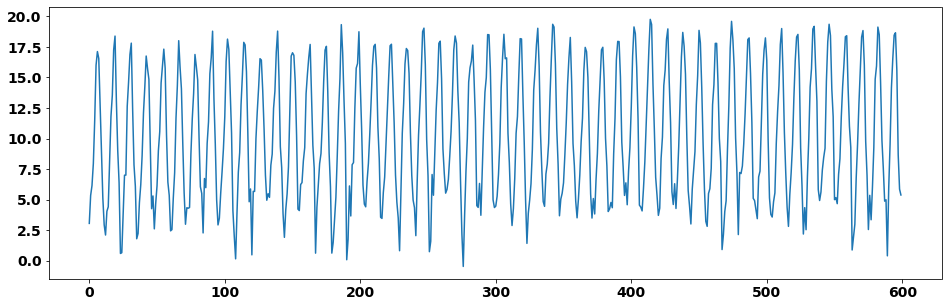

In [324]:
plt.figure(figsize=(16,5))
plt.plot(van_array)

In [316]:
600/12

50.0

In [326]:
np.savetxt("van.csv",van_array, delimiter=",")